# Test using wavelet cross-spectrum to find the phase difference between the high-Q glider signals recorded on two stations

In [275]:
# Import
from matplotlib.pyplot import subplots
from pandas import Timestamp
from numpy import geomspace, meshgrid, flip, pi

from utils_basic import GEO_COMPONENTS, ROOTDIR_GEO, get_unique_stations, power2db
from utils_preproc import read_and_process_windowed_geo_waveforms
from utils_wavelet import extract_freq_phase_pairs, get_stream_station_cross_spectra, get_cwt_freqs
from utils_plot import get_geo_component_color, plot_cwt_powers,  plot_cwt_station_cross_spectra, plot_freq_phase_pairs, save_figure

In [276]:
# Inputs
## Input data
starttime = Timestamp("2020-01-13T20:01:02Z")
dur = 10.0
station1 = "A02"
station2 = "A03"
components = GEO_COMPONENTS

## Wavelet transform
wavelet = "cmor"
bandwidth = 20.0
center_freq = 2.0
scales = geomspace(20, 100, 100)

## Frequency limits for extracting the frequency-phase pairs
freqmin_window = 40.0
freqmax_window = 100.0

## Plotting
cohe_threshold = 0.8
power_threshold = 40.0
freqlim_plot = (30.0, 100.0)

dbmin_spec = 0.0
dbmax_spec = 30.0

dbmin_cross = 0.0
dbmax_cross = 60.0

major_time_spacing = 5.0
minor_time_spacing = 1.0

major_freq_spacing = 20.0
minor_freq_spacing = 5.0

In [277]:
# Read the data
stream = read_and_process_windowed_geo_waveforms(starttime, dur, stations=[station1, station2])

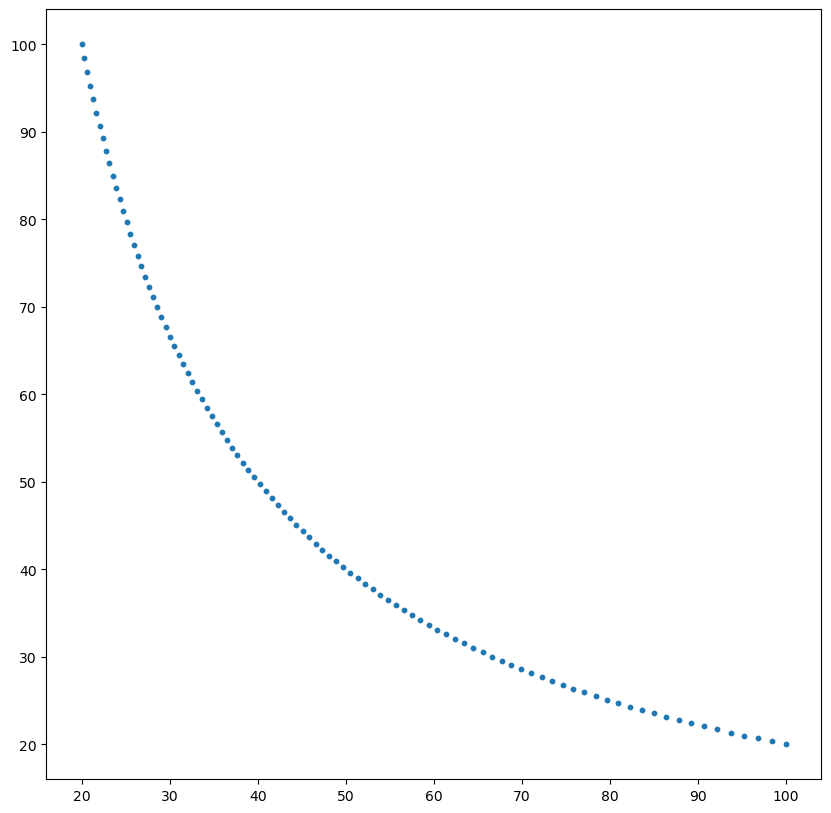

In [278]:
# Compute the frequencies corresponding to the scales and plot
freqs = get_cwt_freqs(scales, wavelet, bandwidth, center_freq)

fig, ax = subplots(1, 1, figsize=(10, 10))
ax.scatter(scales, freqs, s=10)

In [279]:
# Compute the spectra and cross-spectra
specs, cross_specs = get_stream_station_cross_spectra(stream, wavelet=wavelet, bandwidth=bandwidth, center_freq=center_freq, scales=scales, coherence=True)

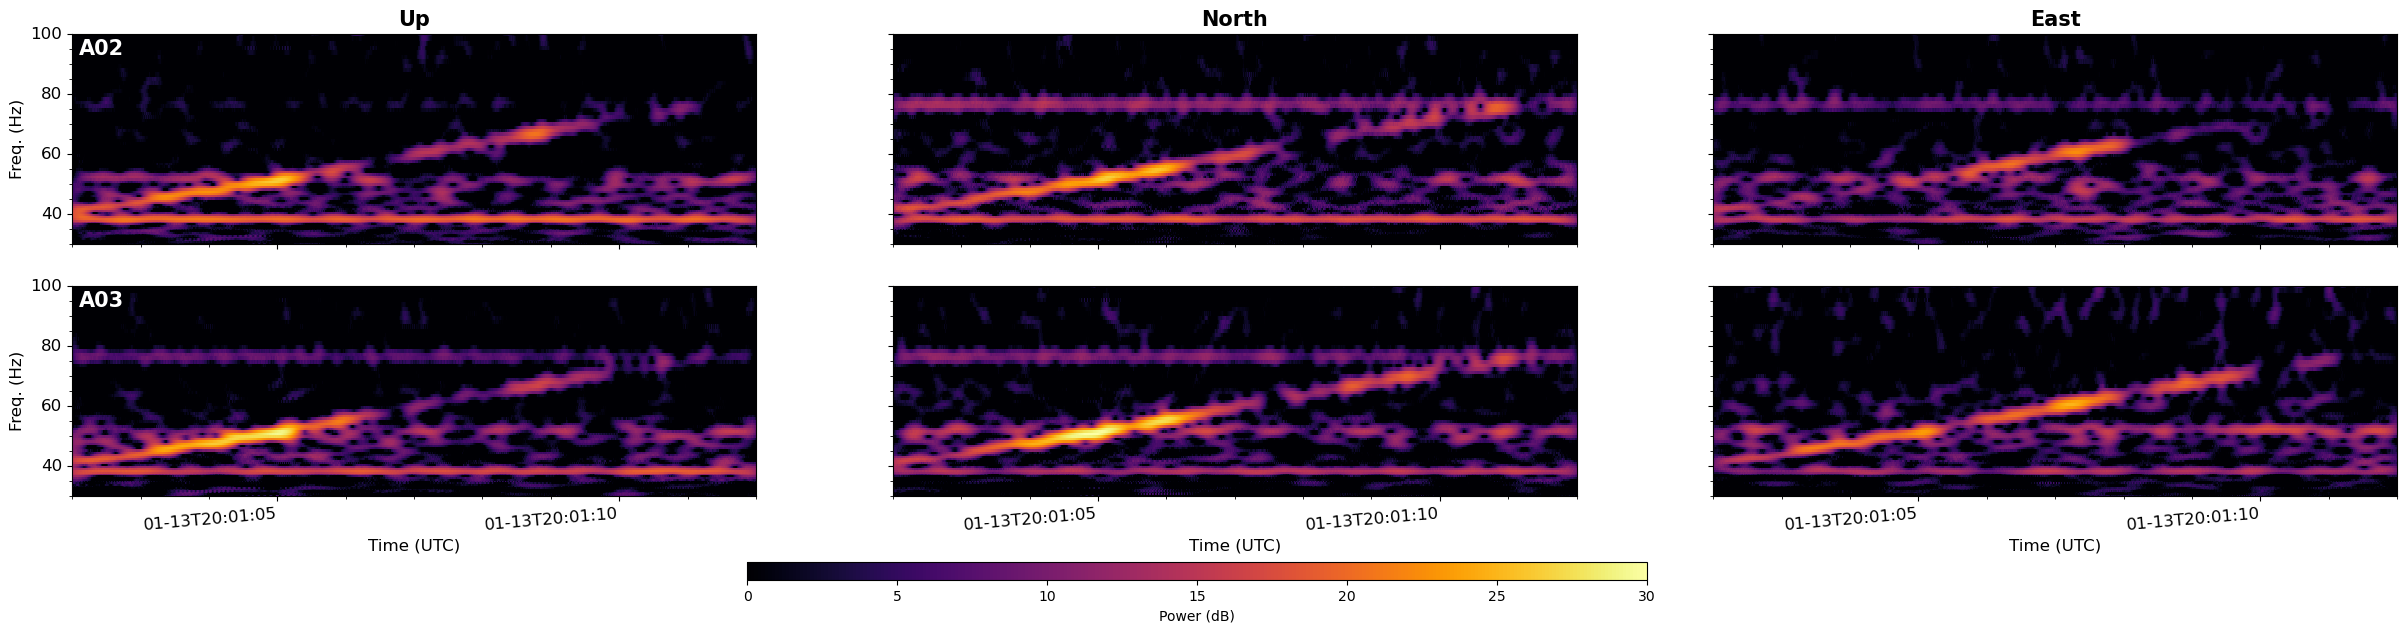

In [280]:
# Plot the CWT powers
fig, axes, cbar = plot_cwt_powers(specs, freqlim=freqlim_plot, major_time_spacing=major_time_spacing, minor_time_spacing=minor_time_spacing, major_freq_spacing=major_freq_spacing, minor_freq_spacing=minor_freq_spacing, 
                                  dbmin=dbmin_spec, dbmax=dbmax_spec)

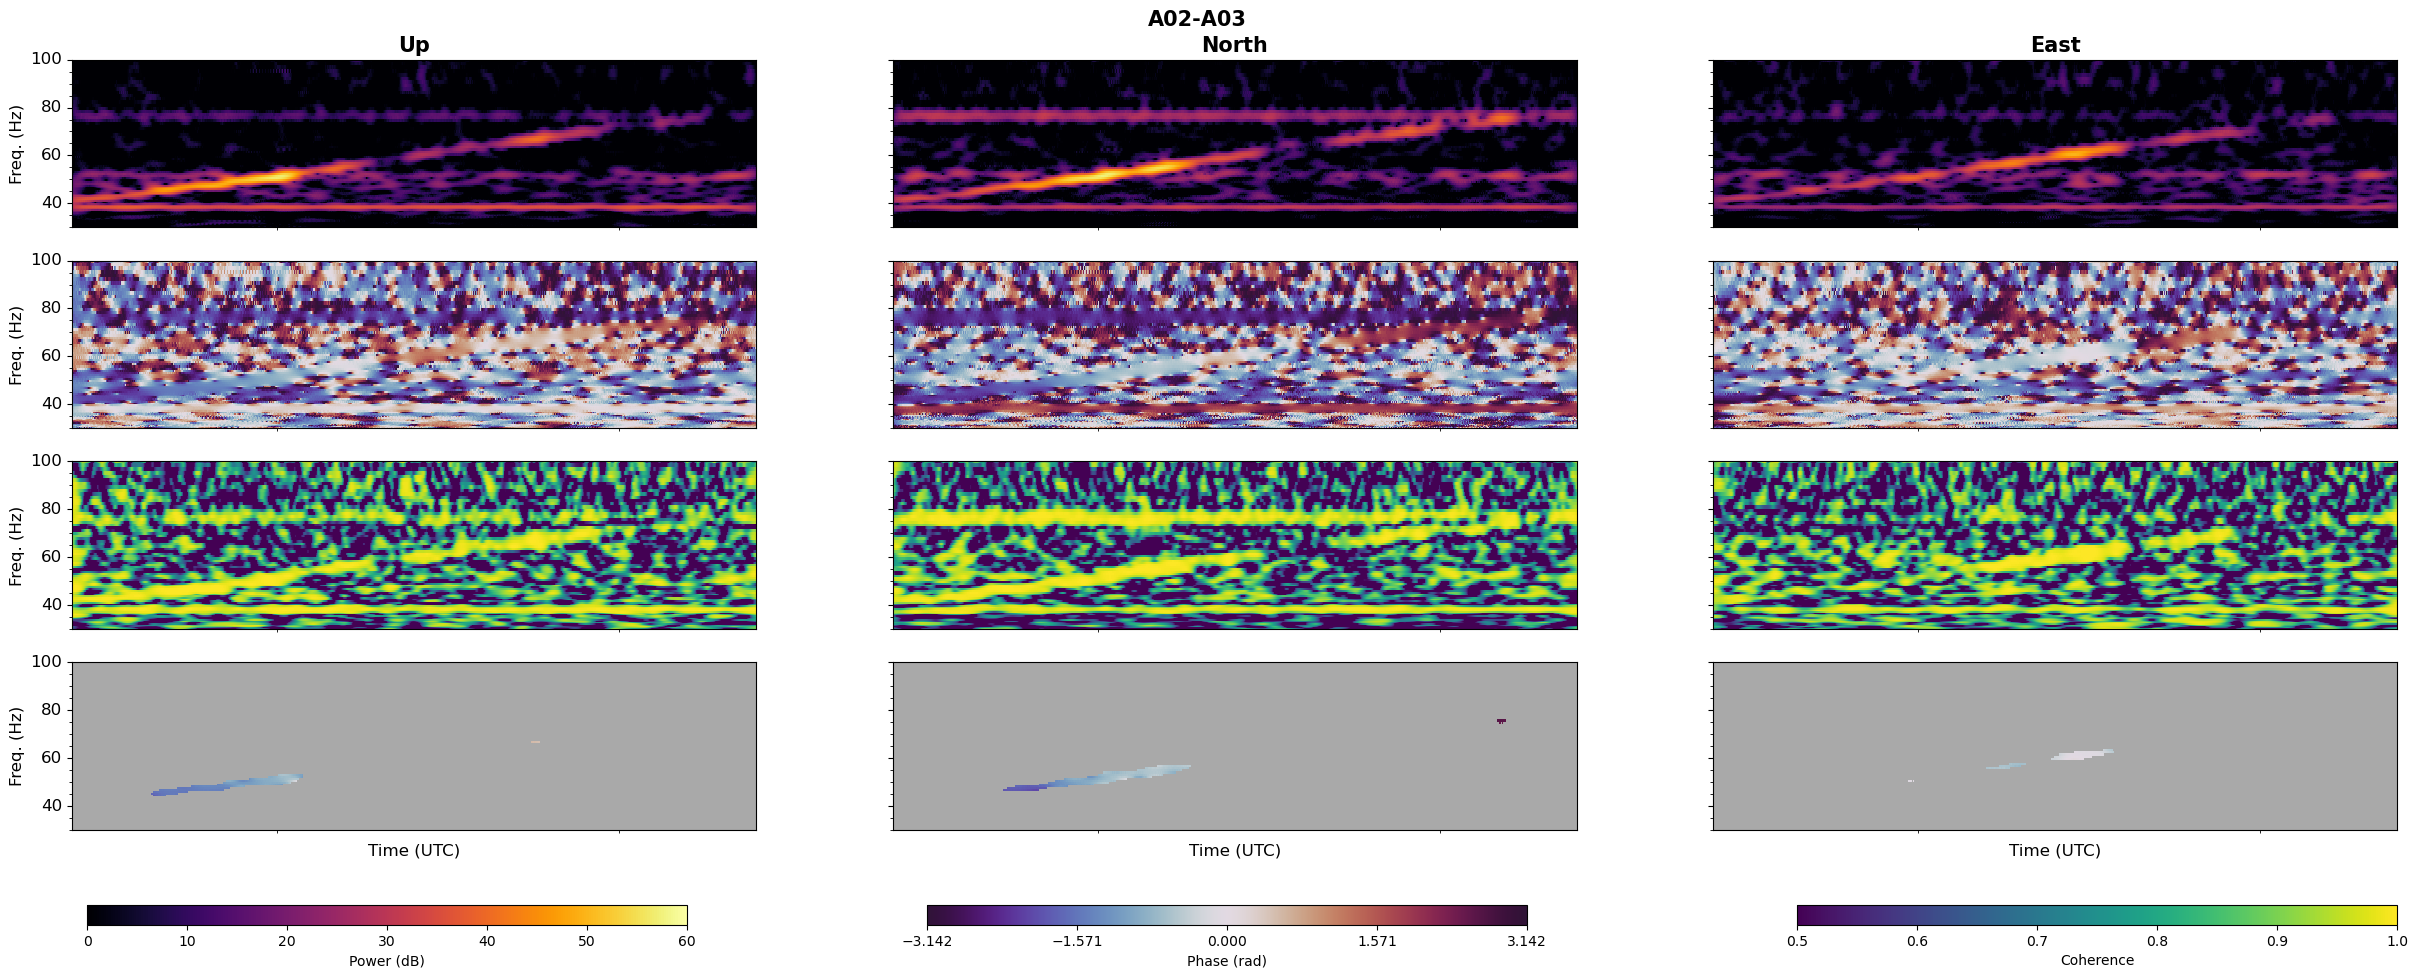

In [281]:
# Plot the cross-spectral powers, phase, and coherence
station_pair = (station1, station2)
fig_cross, axes, power_cbar, phase_cbar, cohe_cbar = plot_cwt_station_cross_spectra(cross_specs, station_pair, 
                                                                      freqlim=freqlim_plot, dbmin=dbmin_cross, dbmax=dbmax_cross,
                                                                      cohe_threshold=cohe_threshold, power_threshold=power_threshold,
                                                                      major_time_spacing=15, minor_time_spacing=5, major_freq_spacing=20.0, minor_freq_spacing=5.0)

In [282]:
# Save the figure
figname = f"cross_spec_{starttime.strftime('%Y%m%dT%H%M%S')}_dur{dur}s_{station1}_{station2}.png"
save_figure(fig_cross, figname, outdir=ROOTDIR_GEO)

Figure saved to /Volumes/OmanData/data/geophones/cross_spec_20200113T200102_dur10.0s_A02_A03.png


67.65595533381705
50.57786678017867
31.30925395101378


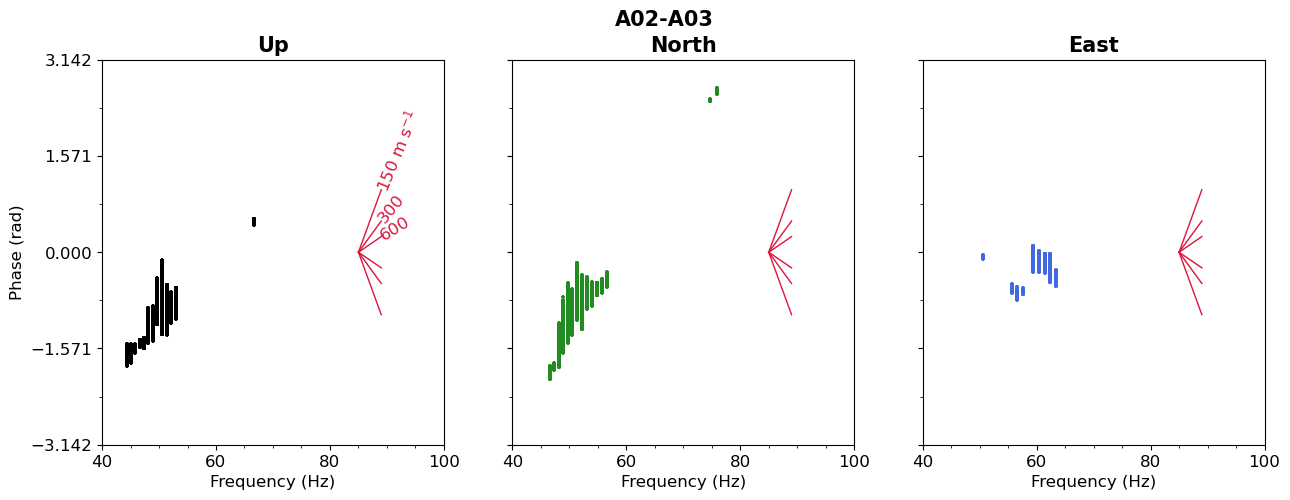

In [283]:
# Extract the frequency-phase pairs and plot them
freq_phi_dict = extract_freq_phase_pairs(cross_specs, freqmin=freqmin_window, freqmax=freqmax_window, power_threshold=power_threshold, cohe_threshold=cohe_threshold)

fig, axes = plot_freq_phase_pairs(freq_phi_dict, station_pair=(station1, station2), freqmin=freqmin_window, freqmax=freqmax_window, major_freq_spacing=20.0, minor_freq_spacing=5.0, major_phase_spacing=pi/2, minor_phase_spacing=pi/4)

In [284]:
# Save the figure
if station1 > station2:
    station1, station2 = station2, station1
    
figname = f"freq_phase_pairs_{starttime.strftime('%Y%m%dT%H%M%S')}_dur{dur}s_{station1}_{station2}.png"
save_figure(fig, figname, outdir=ROOTDIR_GEO)

Figure saved to /Volumes/OmanData/data/geophones/freq_phase_pairs_20200113T200102_dur10.0s_A02_A03.png
